In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_avg_perf(col_perf):
    avg_perf = []
    for i in range(len(col_perf[0])):
        avg_perf.append(np.mean([col_perf[j][i] for j in range(len(col_perf))]))
    return avg_perf

def seperate_poisoned(col_perf, num_poisoned):
    poisoned = []
    unpoisoned = []
    for i in range(len(col_perf)):
        if i < num_poisoned:
            poisoned.append(col_perf[i])
        else:
            unpoisoned.append(col_perf[i])
    return poisoned, unpoisoned

def get_avg_perf_poisoned(col_perf, num_poisoned):
    poisoned, unpoisoned = seperate_poisoned(col_perf, num_poisoned)
    return get_avg_perf(poisoned), get_avg_perf(unpoisoned)

In [3]:
# File paths and corresponding poison levels
file_paths = [
    ('results/sfd-no-poisoning/result_FEMNIST_balanced/col_performance.pkl', None),
    ('results/poison-variation/result_FEMNIST_balanced-p1/col_performance.pkl', 1),
    ('results/poison-variation/result_FEMNIST_balanced-p2/col_performance.pkl', 2),
    ('results/poison-variation/result_FEMNIST_balanced-p3/col_performance.pkl', 3),
    ('results/sfd-poison/result_FEMNIST_balanced/col_performance.pkl', 4)
]

results = {}

for path, poison_level in file_paths:
    with open(path, 'rb') as f:
        col_perf = pickle.load(f)

    if poison_level is None:
        results['p0_unpoisoned'] = get_avg_perf(col_perf)
    else:
        poisoned_avg_perf, unpoisoned_avg_perf = get_avg_perf_poisoned(col_perf, poison_level)
        results[f'p{poison_level}_poisoned'] = poisoned_avg_perf
        results[f'p{poison_level}_unpoisoned'] = unpoisoned_avg_perf

# Access results using keys
p0_unpoisoned = results['p0_unpoisoned']
p1_unpoisoned = results['p1_unpoisoned']
p2_unpoisoned = results['p2_unpoisoned']
p3_unpoisoned = results['p3_unpoisoned']
p4_poisoned = results['p4_poisoned']
p4_unpoisoned = results['p4_unpoisoned']

[]

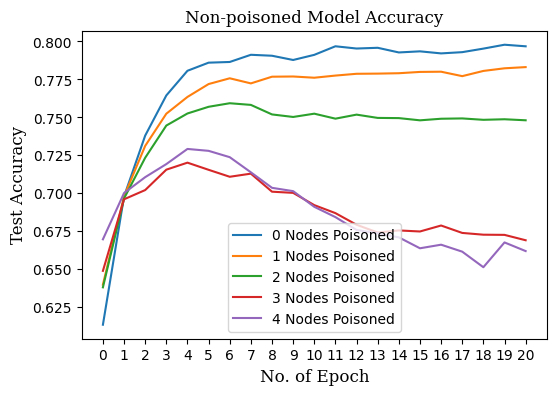

In [15]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }

FIG_SIZE = (6, 4)

plt.figure(figsize=FIG_SIZE)

plt.plot(p0_unpoisoned, label='0 Nodes Poisoned')
plt.plot(p1_unpoisoned, label='1 Nodes Poisoned')
plt.plot(p2_unpoisoned, label='2 Nodes Poisoned')
plt.plot(p3_unpoisoned, label='3 Nodes Poisoned')
plt.plot(p4_unpoisoned, label='4 Nodes Poisoned')

plt.title('Non-poisoned Model Accuracy', fontdict=font)
plt.xlabel('No. of Epoch', fontdict=font)
plt.ylabel('Test Accuracy', fontdict=font)
plt.xticks(list(range(21)))
plt.legend(loc='best')
plt.plot()

In [3]:
# File paths and corresponding poison levels
file_paths = [
    ('results/sfd-no-poisoning/result_FEMNIST_imbalanced/col_performance.pkl', None),
    ('results/poison-variation/result_FEMNIST_imbalanced-p1/col_performance.pkl', 1),
    ('results/poison-variation/result_FEMNIST_imbalanced-p2/col_performance.pkl', 2),
    ('results/poison-variation/result_FEMNIST_imbalanced-p3/col_performance.pkl', 3),
    ('results/sfd-poison/result_FEMNIST_imbalanced/col_performance.pkl', 4)
]

results = {}

for path, poison_level in file_paths:
    with open(path, 'rb') as f:
        col_perf = pickle.load(f)

    if poison_level is None:
        results['p0_unpoisoned'] = get_avg_perf(col_perf)
    else:
        poisoned_avg_perf, unpoisoned_avg_perf = get_avg_perf_poisoned(col_perf, poison_level)
        results[f'p{poison_level}_poisoned'] = poisoned_avg_perf
        results[f'p{poison_level}_unpoisoned'] = unpoisoned_avg_perf

# Access results using keys
p0_unpoisoned = results['p0_unpoisoned']
p1_unpoisoned = results['p1_unpoisoned']
p2_unpoisoned = results['p2_unpoisoned']
p3_unpoisoned = results['p3_unpoisoned']
p4_poisoned = results['p4_poisoned']
p4_unpoisoned = results['p4_unpoisoned']

[]

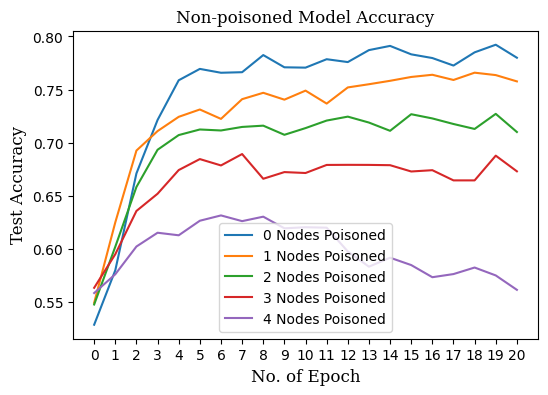

In [4]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }

FIG_SIZE = (6, 4)

plt.figure(figsize=FIG_SIZE)

plt.plot(p0_unpoisoned, label='0 Nodes Poisoned')
plt.plot(p1_unpoisoned, label='1 Nodes Poisoned')
plt.plot(p2_unpoisoned, label='2 Nodes Poisoned')
plt.plot(p3_unpoisoned, label='3 Nodes Poisoned')
plt.plot(p4_unpoisoned, label='4 Nodes Poisoned')

plt.title('Non-poisoned Model Accuracy', fontdict=font)
plt.xlabel('No. of Epoch', fontdict=font)
plt.ylabel('Test Accuracy', fontdict=font)
plt.xticks(list(range(21)))
plt.legend(loc='best')
plt.plot()

In [44]:
def plot_skd_variations():
    font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }

    FIG_SIZE = (6, 4)

    fig, ax = plt.subplots(1, 2, figsize=(FIG_SIZE[0]*2, FIG_SIZE[1])) # Create a figure and a set of subplots

    # Non-poisoned Model Accuracy Plot
    ax[0].plot(p4_unpoisoned, label='Before SKD')
    ax[0].plot(skd_un, label='SKD Fixed')
    ax[0].plot(skd_avg_un, label='SKD Avg')
    ax[0].plot(skd_top25_un, label='SKD Top25')
    ax[0].plot(skd_25to50_un, label='SKD 25to50')
    ax[0].plot(skd_w_avg_un, label='SKD w Avg')
    ax[0].set_title('Non-poisoned Model Accuracy', fontdict=font)
    ax[0].set_xlabel('No. of Epoch', fontdict=font)
    ax[0].set_ylabel('Test Accuracy', fontdict=font)
    ax[0].set_xticks(list(range(21)))
    ax[0].legend(loc='best')

    # Poisoned Model Accuracy Plot
    ax[1].plot(p4_poisoned, label='Before SKD')
    ax[1].plot(skd_p, label='SKD Fixed')
    ax[1].plot(skd_avg_p, label='SKD Avg')
    ax[1].plot(skd_top25_p, label='SKD Top25')
    ax[1].plot(skd_25to50_p, label='SKD 25to50')
    ax[1].plot(skd_w_avg_p, label='SKD w Avg')
    ax[1].set_title('Poisoned Model Accuracy', fontdict=font)
    ax[1].set_xlabel('No. of Epoch', fontdict=font)
    ax[1].set_ylabel('Test Accuracy', fontdict=font)
    ax[1].set_xticks(list(range(21)))
    ax[1].legend()

    plt.tight_layout() # To provide sufficient space for labels of both subplots
    plt.show()

In [50]:
def plot_ssfd_comparison():
    font = {'family': 'serif',
            'color':  'black',
            'weight': 'normal',
            'size': 12,
            }

    FIG_SIZE = (6, 4)

    fig, ax = plt.subplots(1, 2, figsize=(FIG_SIZE[0]*2, FIG_SIZE[1])) # Create a figure and a set of subplots

    ax[0].plot(ssfd_un, label='SSFD')
    ax[0].plot(skd_un, label='SKD Fixed')
    ax[0].plot(skd_avg_un, label='SKD Avg')
    ax[0].plot(skd_top25_un, label='SKD Top25')
    ax[0].plot(skd_25to50_un, label='SKD 25to50')
    ax[0].plot(skd_w_avg_un, label='SKD w Avg')

    ax[0].set_title('Non-poisoned Model Accuracy', fontdict=font)
    ax[0].set_xlabel('No. of Epoch', fontdict=font)
    ax[0].set_ylabel('Test Accuracy', fontdict=font)
    ax[0].set_xticks(list(range(21)))
    ax[0].legend(loc='best')


    ax[1].plot(ssfd_p, label='SSFD')
    ax[1].plot(skd_p, label='SKD Fized')
    ax[1].plot(skd_avg_p, label='SKD Avg')
    ax[1].plot(skd_top25_p, label='SKD Top25')
    ax[1].plot(skd_25to50_p, label='SKD 25to50')
    ax[1].plot(skd_w_avg_p, label='SKD w Avg')

    ax[1].set_title('Poisoned Model Accuracy', fontdict=font)
    ax[1].set_xlabel('No. of Epoch', fontdict=font)
    ax[1].set_ylabel('Test Accuracy', fontdict=font)
    ax[1].set_xticks(list(range(21)))
    ax[1].legend()

    plt.tight_layout() # To provide sufficient space for labels of both subplots
    plt.show()

In [45]:
def load_and_get_avg_perf(file_path):
    with open(file_path, 'rb') as f:
        col_perf = pickle.load(f)
    return get_avg_perf_poisoned(col_perf, 4)

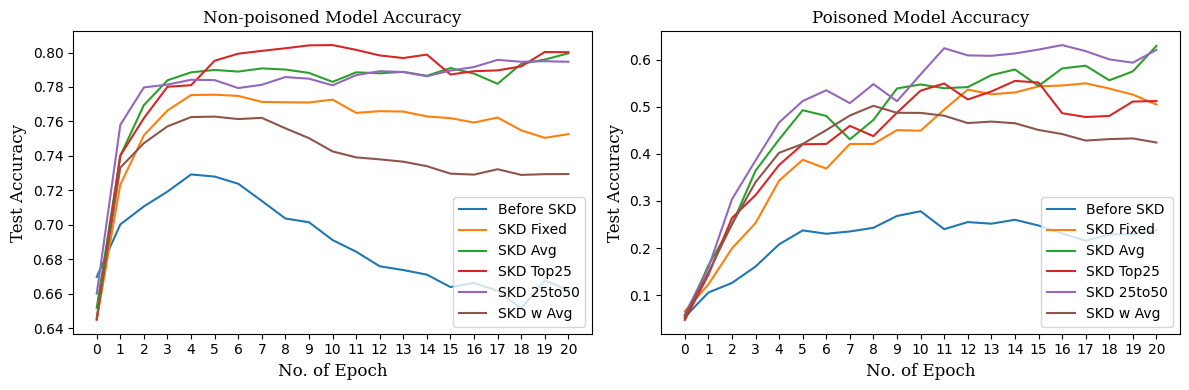

In [51]:
base_path = 'results/{0}/result_FEMNIST_balanced/col_performance.pkl'

skd_p, skd_un = load_and_get_avg_perf(base_path.format('skd'))
skd_avg_p, skd_avg_un = load_and_get_avg_perf(base_path.format('skd-avg'))
skd_top25_p, skd_top25_un = load_and_get_avg_perf(base_path.format('skd-top25'))
skd_25to50_p, skd_25to50_un = load_and_get_avg_perf(base_path.format('skd-25to50'))
skd_w_avg_p, skd_w_avg_un = load_and_get_avg_perf(base_path.format('skd-w-avg'))

plot_skd_variations()


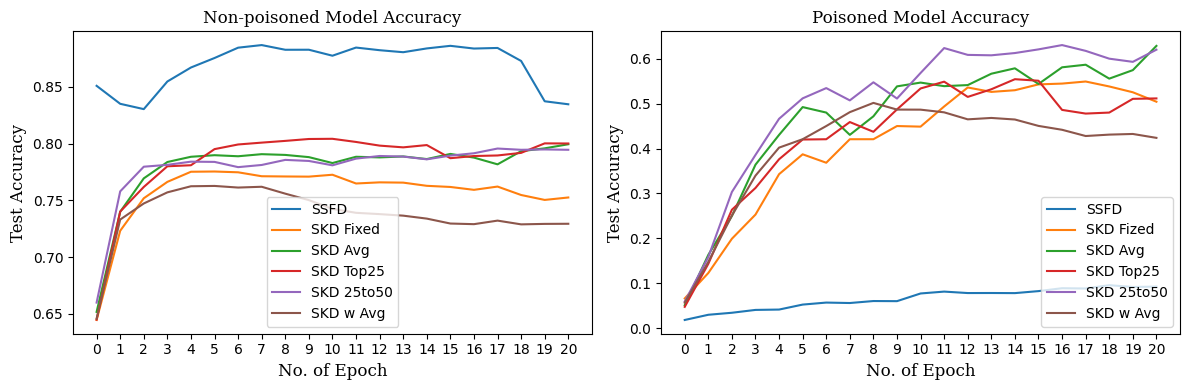

In [52]:
with open('results/ssfd/result_FEMNIST_balanced/col_performance.pkl', 'rb') as f:
    col_perf = pickle.load(f)

ssfd_p, ssfd_un = get_avg_perf_poisoned(col_perf, 4)

plot_ssfd_comparison()

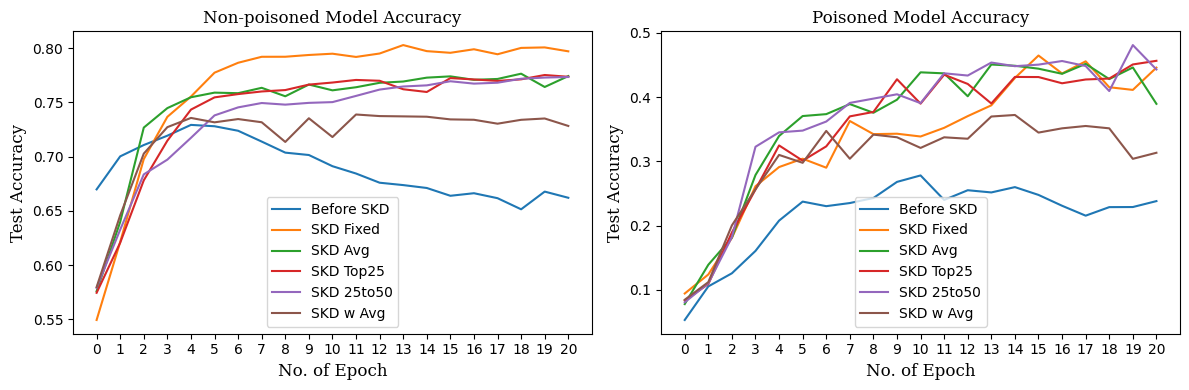

In [53]:
base_path = 'results/{0}/result_FEMNIST_imbalanced/col_performance.pkl'

skd_p, skd_un = load_and_get_avg_perf(base_path.format('skd'))
skd_avg_p, skd_avg_un = load_and_get_avg_perf(base_path.format('skd-avg'))
skd_top25_p, skd_top25_un = load_and_get_avg_perf(base_path.format('skd-top25'))
skd_25to50_p, skd_25to50_un = load_and_get_avg_perf(base_path.format('skd-25to50'))
skd_w_avg_p, skd_w_avg_un = load_and_get_avg_perf(base_path.format('skd-w-avg'))

plot_skd_variations()

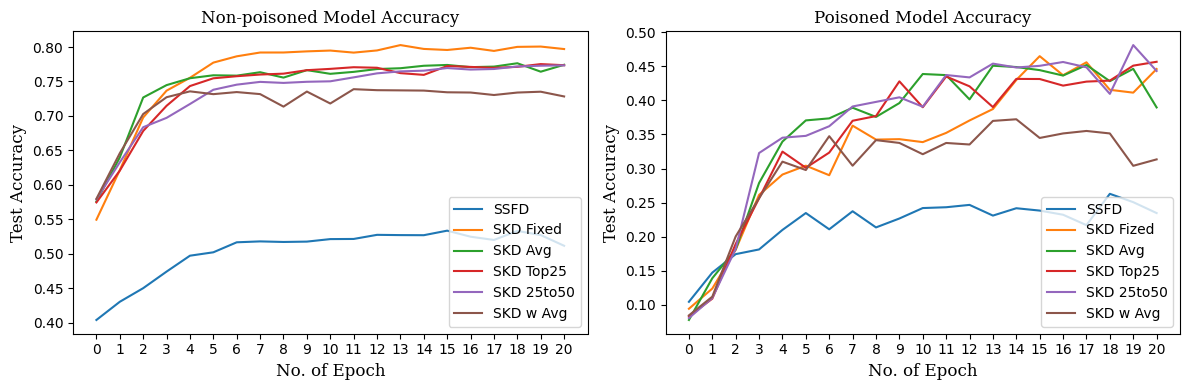

In [54]:
with open('results/ssfd/result_FEMNIST_imbalanced/col_performance.pkl', 'rb') as f:
    col_perf = pickle.load(f)

ssfd_p, ssfd_un = get_avg_perf_poisoned(col_perf, 4)

plot_ssfd_comparison()

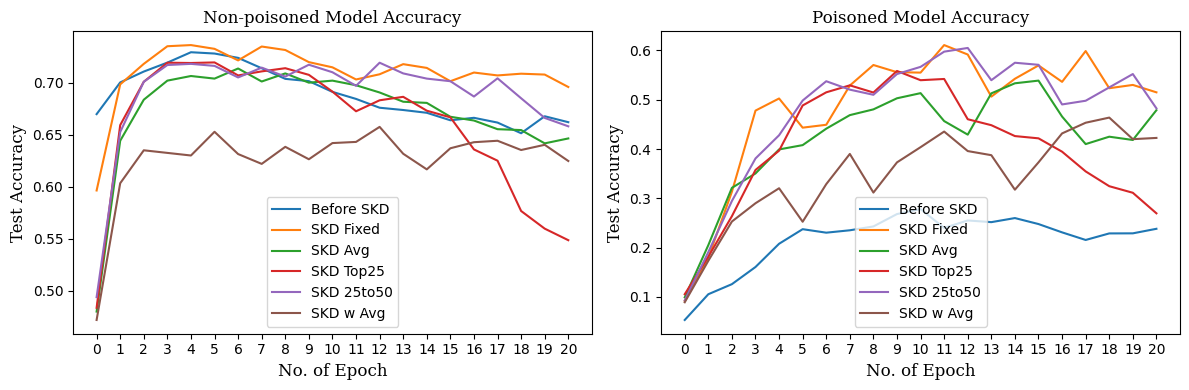

In [55]:
base_path = 'results/{0}/result_CIFAR_balanced/col_performance.pkl'

skd_p, skd_un = load_and_get_avg_perf(base_path.format('skd'))
skd_avg_p, skd_avg_un = load_and_get_avg_perf(base_path.format('skd-avg'))
skd_top25_p, skd_top25_un = load_and_get_avg_perf(base_path.format('skd-top25'))
skd_25to50_p, skd_25to50_un = load_and_get_avg_perf(base_path.format('skd-25to50'))
skd_w_avg_p, skd_w_avg_un = load_and_get_avg_perf(base_path.format('skd-w-avg'))

plot_skd_variations()

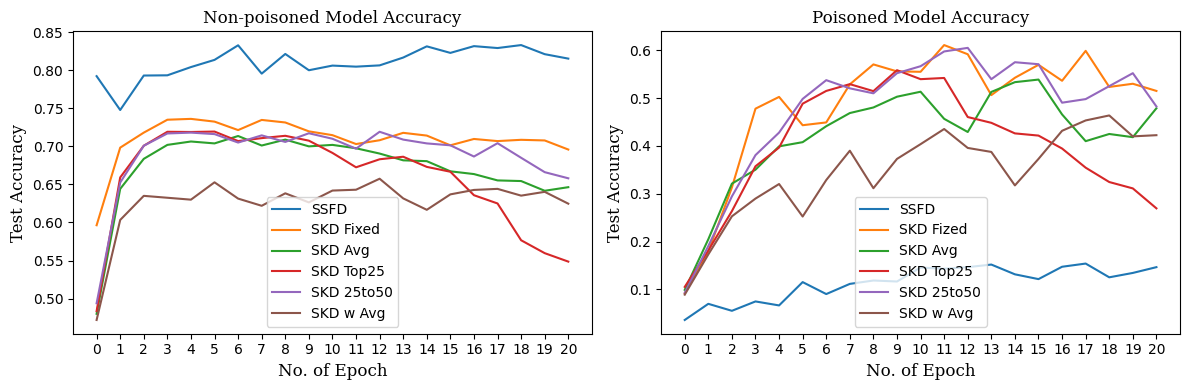

In [56]:
with open('results/ssfd/result_CIFAR_balanced/col_performance.pkl', 'rb') as f:
    col_perf = pickle.load(f)

ssfd_p, ssfd_un = get_avg_perf_poisoned(col_perf, 4)

plot_ssfd_comparison()